In [48]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
torch.__version__

'2.6.0'

### 1. Data preparing and loading...

In [50]:
M = torch.tensor(data=[3 , 6, -0.04, -2.1], device='mps', dtype=torch.float).unsqueeze(1)
Q = 15.6
#let's prepare some synthetic data
X = torch.randint(
    low=-8,
    high=27,
    device='mps',
    size=(50_000, 4),
    dtype=torch.float
)
y = X @ M + Q

print(f'Shape of tensor X: {X.shape} | Shape of tensor y: {y.shape}')

Shape of tensor X: torch.Size([50000, 4]) | Shape of tensor y: torch.Size([50000, 1])


In [51]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=4, out_features=1, device='mps')
    
    def forward(self, x):
        x = self.linear_layer(x)
        return x
    
linear_model = LinearRegression()

In [52]:
LEARNING_RATE = 1e-3
PATIENCE = 25 #nr of iterations which must result in a loss lower than a given threshold, which the system must wait prior to stop the loop
LOSS_DELTA_THRESHOLD = 1e-6
MAX_ITERATIONS = 100_000
iteration_converged = 0
loss_foo = nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=LEARNING_RATE)

loss_history=[]
iteration = 0

while True:
    iteration += 1
    prediction = linear_model(X) #forward step
    step_loss = torch.sqrt(loss_foo(prediction, y))
    loss_history.append(step_loss.item())
    step_loss.backward() #computes the grad of the tensor, with respect to its varialbes where a requires_grad is set to True
    optimizer.step()
    optimizer.zero_grad()
    if iteration % 100 == 0:
        print(f'Iteration: {iteration}, Loss: {step_loss.item():.5f}')
    loss_delta = loss_history[-1] - loss_history[-2] if len(loss_history) > 5 else 1000
    if abs(loss_delta) < LOSS_DELTA_THRESHOLD:
        iteration_converged += 1
    if (iteration_converged >= PATIENCE) or (iteration > MAX_ITERATIONS):
        break
        

Iteration: 100, Loss: 81.43188
Iteration: 200, Loss: 58.03502
Iteration: 300, Loss: 41.93195
Iteration: 400, Loss: 30.57482
Iteration: 500, Loss: 21.06225
Iteration: 600, Loss: 13.00974
Iteration: 700, Loss: 8.48117
Iteration: 800, Loss: 7.59656
Iteration: 900, Loss: 7.50445
Iteration: 1000, Loss: 7.47590
Iteration: 1100, Loss: 7.45154
Iteration: 1200, Loss: 7.42746
Iteration: 1300, Loss: 7.40340
Iteration: 1400, Loss: 7.37934
Iteration: 1500, Loss: 7.35528
Iteration: 1600, Loss: 7.33121
Iteration: 1700, Loss: 7.30715
Iteration: 1800, Loss: 7.28308
Iteration: 1900, Loss: 7.25902
Iteration: 2000, Loss: 7.23495
Iteration: 2100, Loss: 7.21089
Iteration: 2200, Loss: 7.18683
Iteration: 2300, Loss: 7.16276
Iteration: 2400, Loss: 7.13870
Iteration: 2500, Loss: 7.11464
Iteration: 2600, Loss: 7.09058
Iteration: 2700, Loss: 7.06652
Iteration: 2800, Loss: 7.04246
Iteration: 2900, Loss: 7.01840
Iteration: 3000, Loss: 6.99433
Iteration: 3100, Loss: 6.97027
Iteration: 3200, Loss: 6.94621
Iteration: 

In [53]:
print('Number of iterations: ', iteration)
for param_value, param in zip(linear_model.parameters(), ['weights', 'bias']):
    print(f'{param}: {param_value}')

print(f'\nRMSE_Loss: {np.sqrt(loss_history[-1]):.4f}')

Number of iterations:  31394
weights: Parameter containing:
tensor([[ 3.0039,  6.0038, -0.0362, -2.0961]], device='mps:0',
       requires_grad=True)
bias: Parameter containing:
tensor([15.2635], device='mps:0', requires_grad=True)

RMSE_Loss: 0.4609


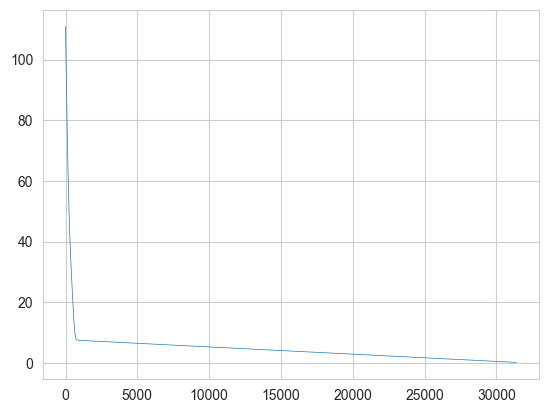

In [54]:
plt.plot(loss_history,
         linewidth=0.5,)

In [55]:
X_test = torch.randint(
    low=-8,
    high=27,
    device='mps',
    size=(10_000, 4),
    dtype=torch.float
)
y_test = X_test @ M + Q

In [56]:
linear_model.eval()
with torch.inference_mode():
    y_pred_test = linear_model(X_test)
print(f'Shape of y_pred_test: {y_pred_test.shape} | Shape of y_test: {y_test.shape}')
rmse = torch.sqrt(loss_foo(y_pred_test, y_test))
print(f'RMSE on test set: {rmse:.4f}')

Shape of y_pred_test: torch.Size([10000, 1]) | Shape of y_test: torch.Size([10000, 1])
RMSE on test set: 0.2122
